Objectives:

1. Detect and handle missing values

2. Detect the outlier and handle it

In [1]:
#Reading Data
import pandas as pd
import numpy as np

#load dataset
df=pd.read_csv('/content/customer_purchase_behavior.csv')
df.head()

,CustomerID,Age,Income,PurchaseAmount,TransactionsPerMonth,LoyaltyMember
0,1,56,93969.0,176.420529,7,No
1,2,69,63001.0,294.213237,19,No
2,3,46,96552.0,113.415901,2,No
3,4,32,43897.0,410.988641,10,No
4,5,60,88148.0,83.547790,13,Yes


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            50 non-null     int64  
 1   Age                   50 non-null     int64  
 2   Income                45 non-null     float64
 3   PurchaseAmount        50 non-null     float64
 4   TransactionsPerMonth  50 non-null     int64  
 5   LoyaltyMember         50 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB
None


In [3]:
#Checking for missing values
print(df.isnull().sum())   #print(df.isna().sum())

CustomerID              0
Age                     0
Income                  5
PurchaseAmount          0
TransactionsPerMonth    0
LoyaltyMember           0
dtype: int64


How to handle Missing values:

1. Removal-very less missing values
2. Imputation/Replace
    1. Mean/Median Imputation (Numerical Data)
    2. Mode Imputation (categorical data)

In [4]:
#Remove rows
df.dropna(inplace=True)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            45 non-null     int64  
 1   Age                   45 non-null     int64  
 2   Income                45 non-null     float64
 3   PurchaseAmount        45 non-null     float64
 4   TransactionsPerMonth  45 non-null     int64  
 5   LoyaltyMember         45 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB
None


In [6]:
#Reload data
df=pd.read_csv('/content/customer_purchase_behavior.csv')

In [7]:
print(df.describe())  #Before Imputation

       CustomerID       Age         Income  PurchaseAmount  \
count    50.00000  50.00000      45.000000       50.000000   
mean     25.50000  43.82000   76026.755556      636.983814   
std      14.57738  15.05187   28811.731431     1574.966179   
min       1.00000  19.00000   21016.000000       25.000000   
25%      13.25000  32.25000   52606.000000      142.806336   
50%      25.50000  41.50000   85697.000000      275.532415   
75%      37.75000  56.00000   98953.000000      391.764457   
max      50.00000  69.00000  119299.000000     8000.000000   

       TransactionsPerMonth  
count             50.000000  
mean              11.660000  
std               13.789393  
min                0.000000  
25%                3.000000  
50%                9.000000  
75%               14.500000  
max               70.000000  


In [8]:
print(np.median(df['Income']))

nan


In [9]:
!pip install numpy

In [10]:
!pip install pandas

In [11]:
#Imputing missing values with median of the feature
df['Income']=df['Income'].fillna(df['Income'].median())
#df['Income'].fillna(df['Income'].median(),inplace=True)
#df['Income']=df['Income'].fillna(df['Income'].mean())

In [12]:
print(df.isnull().sum())

CustomerID              0
Age                     0
Income                  0
PurchaseAmount          0
TransactionsPerMonth    0
LoyaltyMember           0
dtype: int64


In [13]:
print(df.describe()) #After Imputation

       CustomerID       Age         Income  PurchaseAmount  \
count    50.00000  50.00000      50.000000       50.000000   
mean     25.50000  43.82000   76993.780000      636.983814   
std      14.57738  15.05187   27459.026812     1574.966179   
min       1.00000  19.00000   21016.000000       25.000000   
25%      13.25000  32.25000   56206.250000      142.806336   
50%      25.50000  41.50000   85697.000000      275.532415   
75%      37.75000  56.00000   97029.750000      391.764457   
max      50.00000  69.00000  119299.000000     8000.000000   

       TransactionsPerMonth  
count             50.000000  
mean              11.660000  
std               13.789393  
min                0.000000  
25%                3.000000  
50%                9.000000  
75%               14.500000  
max               70.000000  


Detect the outliers

<Axes: >

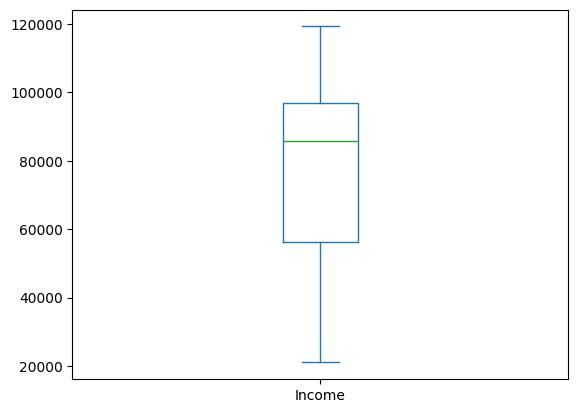

In [14]:
df["Income"].plot(kind="box")

<Axes: >

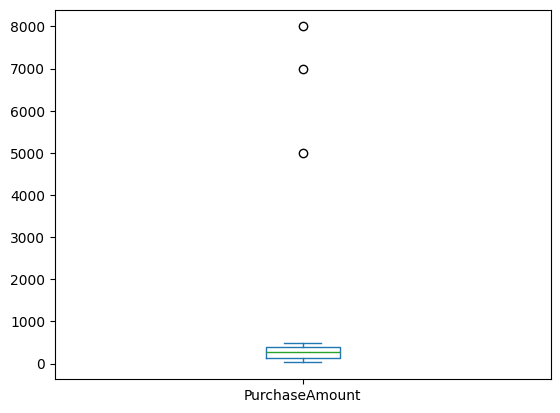

In [16]:
df['PurchaseAmount'].plot(kind='box')

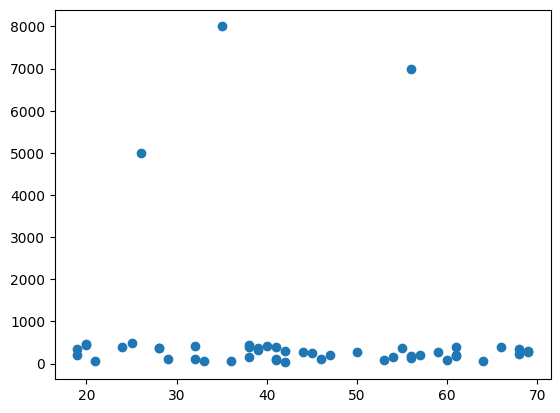

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['PurchaseAmount'])
plt.show()

In [19]:
#Function to detect the outliers
def detect_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=data[(data[column]<lower_bound) | (data[column]>upper_bound)]
  return outliers

In [20]:
print("Outliers in PurchaseAmount:")
print(detect_outliers(df,'PurchaseAmount'))

Outliers in PurchaseAmount:
    CustomerID  Age   Income  PurchaseAmount  TransactionsPerMonth  \
45          46   26  85697.0          5000.0                    50   
46          47   56  85697.0          7000.0                    60   
47          48   35  85697.0          8000.0                    70   

   LoyaltyMember  
45           Yes  
46            No  
47            No  


In [21]:
def cap_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  data.loc[(data[column]<lower_bound),column]=lower_bound
  data.loc[(data[column]>upper_bound),column]=upper_bound
  #Alternate
  #data[column].np.where(data[column]<lower_bound,lower_bound,data[column])
  #data[column].np.where(data[column]>upper_bound,upper_bound,data[column])
  return data

In [22]:
cap_outliers(df,'PurchaseAmount')

,CustomerID,Age,Income,PurchaseAmount,TransactionsPerMonth,LoyaltyMember
0,1,56,93969.0,176.420529,7,No
1,2,69,63001.0,294.213237,19,No
2,3,46,96552.0,113.415901,2,No
3,4,32,43897.0,410.988641,10,No
4,5,60,88148.0,83.547790,13,Yes
5,6,25,43483.0,494.099121,6,No
6,7,38,68555.0,397.510146,12,Yes
7,8,56,37159.0,139.422057,12,Yes
8,9,36,100077.0,52.484953,11,No
9,10,40,55920.0,416.957643,7,Yes


<Axes: >

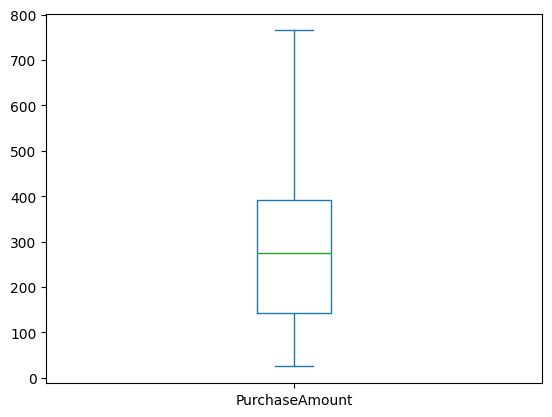

In [23]:
df['PurchaseAmount'].plot(kind='box')

In [25]:
df=pd.read_csv("/content/dirtydata.csv.csv")
df.head()

,Duration,Date,Pulse,Maxpulse,Calories,Gender
0,60,2020/12/01',110,130,409.1,M
1,60,2020/12/02',117,145,479.0,F
2,60,2020/12/03',103,135,340.0,F
3,45,2020/12/04',109,175,282.4,F
4,45,2020/12/05',117,148,406.0,NaN


In [26]:
df.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2
Gender,5


In [27]:
df.fillna(df['Gender'].mode()[0],inplace=True)
df.isnull().sum()

<ipython-input-27-3703984740>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(df['Gender'].mode()[0],inplace=True)


,0
Duration,0
Date,0
Pulse,0
Maxpulse,0
Calories,0
Gender,0


In [28]:
df=pd.read_csv("/content/loan_eligibility_dataset.csv")
print(df.head())

   CustomerID  Income  LoanAmount  CreditScore  DebtToIncomeRatio LoanApproved
0           1   45795       46606          771               0.27           No
1           2   30860       92313          362               0.65           No
2           3  133694      146699          438               0.00          Yes
3           4  149879       13792          798               0.35           No
4           5  140268      179073          691               0.30          Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         50 non-null     int64  
 1   Income             50 non-null     int64  
 2   LoanAmount         50 non-null     int64  
 3   CreditScore        50 non-null     int64  
 4   DebtToIncomeRatio  50 non-null     float64
 5   LoanApproved       50 non-null     object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [33]:
df_numerical=df[['Income','LoanAmount','CreditScore','DebtToIncomeRatio']]
df_numerical.head()

,Income,LoanAmount,CreditScore,DebtToIncomeRatio
0,45795,46606,771,0.27
1,30860,92313,362,0.65
2,133694,146699,438,0.00
3,149879,13792,798,0.35
4,140268,179073,691,0.30


In [37]:
st=StandardScaler()
df_scaled=st.fit_transform(df_numerical)
df_scaled=pd.DataFrame(df_scaled,columns=df_numerical.columns)
df_scaled.head()

,Income,LoanAmount,CreditScore,DebtToIncomeRatio
0,-1.271665,-0.744736,1.113694,-0.729006
1,-1.698694,0.026258,-1.251561,0.709323
2,1.241592,0.943651,-0.812051,-1.750976
3,1.704363,-1.298248,1.269835,-0.426200
4,1.429560,1.489741,0.651052,-0.615453


In [38]:
print(df_numerical.describe())

              Income     LoanAmount  CreditScore  DebtToIncomeRatio
count      50.000000      50.000000    50.000000          50.000000
mean    90270.380000   90756.340000   578.420000           0.462600
std     35329.218316   59885.102152   174.675687           0.266878
min     30769.000000    6016.000000   304.000000           0.000000
25%     62606.500000   42309.750000   435.000000           0.250000
50%     94872.500000   86437.500000   541.000000           0.430000
75%    114610.000000  136414.750000   749.500000           0.687500
max    149879.000000  199776.000000   846.000000           1.000000


In [39]:
value=45795
z=(value-90270.380000)/35329.218316
print(z)

-1.2588837828845443
